In [1]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/HACKER EARTH/hackerearth-machine-learning-challenge-reduce-marketing-spend/f167b0fc922411eb.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')


finish


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("/content/dataset/train.csv")
test=pd.read_csv("/content/dataset/test.csv")
subm=pd.read_csv("/content/dataset/sample_submission.csv")

In [3]:
train[:5]

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             7007 non-null   object 
 1   Lead_name              7007 non-null   object 
 2   Industry               7006 non-null   object 
 3   Deal_value             6956 non-null   object 
 4   Weighted_amount        6482 non-null   object 
 5   Date_of_creation       7007 non-null   object 
 6   Pitch                  7007 non-null   object 
 7   Contact_no             7007 non-null   object 
 8   Lead_revenue           7007 non-null   object 
 9   Fund_category          7007 non-null   object 
 10  Geography              6035 non-null   object 
 11  Location               6996 non-null   object 
 12  POC_name               6999 non-null   object 
 13  Designation            7007 non-null   object 
 14  Lead_POC_email         7007 non-null   object 
 15  Hiri

In [5]:
train.describe()

,Internal_rating,Success_probability
count,7007.000000,7007.000000
mean,3.009562,64.745133
std,1.418666,17.931635
min,1.000000,-5.000000
25%,2.000000,60.600000
50%,3.000000,65.300000
75%,4.000000,69.600000
max,5.000000,107.340000


In [6]:
subm[:5]

,Deal_title,Success_probability
0,TitleM5DZY,48.6
1,TitleKIW18,33.9
2,TitleFXSDN,43.8
3,TitlePSK4Y,39.5
4,Title904GV,37.4


In [7]:
test[:5]

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988$,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,India,Bhubaneshwar,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961$,2541758.2$,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,USA,"Coeur d'Alene, ID",Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433$,3041031.0$,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,USA,"Portland-South Portland, ME",Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952$,1521716.4$,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,India,Bareilly,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835$,2455218.75$,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,USA,"Trenton, NJ",Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [8]:
# set target feature
targetFeature='Success_probability'

In [9]:
def datashape(df):
  rows,columns=df.shape
  print("The dataset contains ",rows,"rows and",columns,"columns.")

In [10]:
# segregate numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [11]:
datashape(train)

The dataset contains  7007 rows and 23 columns.


In [12]:
datashape(test)

The dataset contains  2093 rows and 22 columns.


In [13]:
# remove ID from training data
train.drop(['Deal_title'], inplace=True, axis=1)

In [14]:
# check for duplicates
print(train.shape)
train.drop_duplicates(inplace=True)
print(train.shape)

(7007, 22)
(7007, 22)


In [15]:
train.isnull().sum()

Lead_name                  0
Industry                   1
Deal_value                51
Weighted_amount          525
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
POC_name                   8
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Internal_POC               0
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [16]:
continuous_data, categorical_data = divideFeatures(train)

In [17]:
categorical_data[:5]

,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource
0,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN
1,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No
2,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No
3,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements
4,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No


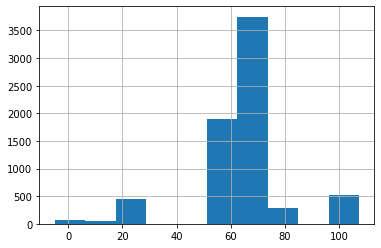

In [18]:
# check target feature distribution
train[targetFeature].hist()
plt.show()

In [19]:
for col in categorical_data:
    print(f'{col} : {categorical_data[col].unique()}')

Lead_name : ['Davis, Perkins and Bishop Inc' 'Bender PLC LLC' 'Carter-Henry and Sons'
 ... 'Romero-Juarez PLC' 'Sullivan, Mooney and Elliott LLC'
 'Jones LLC and Sons']
Industry : ['Restaurants' 'Construction Services' 'Hospitals/Clinics' 'Real Estate'
 'Financial Services' 'Banks' 'Architecture/Engineering'
 'Education/Training' 'REIT' 'Healthcare Facilities/Services'
 'Hotels/Motels' 'Biotech/Healthcare' 'Services' 'Other Investment Firms'
 'Software' 'Other Biz Services' 'Materials/Manufacturing' 'Other'
 'Trucking' 'Automotive/Transportation' 'Constr - Supplies'
 'Casinos/Gaming' 'Food Processing' 'BioTech/Drugs'
 'Investment Bank/Brokerage' 'Technology Consulting' 'Grocery'
 'Online Banking' 'Staffing' 'Associations' 'Consumer Products'
 'Professional Services' 'Insurance' 'Beverages (Non-Alcoholic)'
 'Non-Profit' 'Internet Software' 'Software Consulting' 'Energy'
 'Furniture/Fixtures' 'Recreational Products' 'Chemical Manufacturing'
 'Personal Services' 'Training' 'Health/Acciden

In [20]:
for col in continuous_data:
    print(f'{col} : {continuous_data[col].unique()}')

Internal_rating : [3 5 4 1 2]
Success_probability : [ 73.6   58.9   68.8   64.5   62.4   66.3   73.4   74.1   61.4   66.
  67.9   63.9   71.5   26.35  60.7   71.    70.    66.4   61.9   63.7
 107.34  60.1   62.9   68.6   64.8   68.3   57.8   56.2   76.1   60.8
  58.8   64.1   69.7   65.6   73.1   69.9   66.2   65.8   68.1   70.4
  64.2   -5.    60.3   58.6   63.6   68.5   55.7   60.2   59.9   69.4
  73.5   59.1   60.9   70.6   62.    63.4   66.1   64.6   59.6   76.2
  62.5   67.3   70.8   61.8   64.    65.3   72.9   69.2   55.6   67.1
  55.4   55.9   67.7   70.1   57.2   69.6   59.4   57.5   65.4   61.5
  64.9   63.3   67.2   70.7   65.1   61.1   68.4   65.7   60.4   74.8
  75.2   61.7   73.8   61.6   72.7    8.    57.6   57.4   69.3   63.5
  64.4   75.6   59.    56.9   73.9   66.9   57.1   58.3   66.7   75.
  72.6   59.2   60.6   66.8   70.3   65.9   68.    71.9   66.6   63.
  71.2   67.4   67.    57.3   65.5   72.    67.6   67.8   73.2   71.6
  58.4   61.2   67.5   54.9   65.    75.1

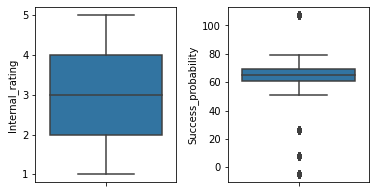

In [21]:
# boxplots of numerical features for outlier detection
import seaborn as sns
fig = plt.figure(figsize=(8,8))
for i in range(len(continuous_data.columns)):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y=continuous_data.iloc[:,i])
plt.tight_layout()
plt.show()

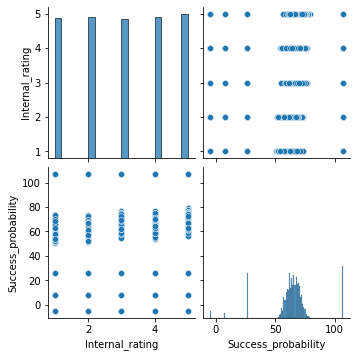

In [22]:
sns.pairplot(train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


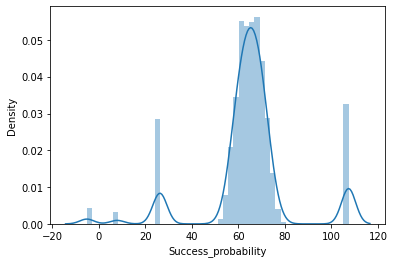

In [23]:
# Checking skewness for dependent Variable. It shows the dependent variable is 'right skewed'. 
sns.distplot(train['Success_probability'])
plt.show()

In [24]:
# Log transformed dependent variable does'nt work
#sns.distplot(np.log1p(train['Success_probability']))
#plt.show()

In [25]:
#train['Success_probability']=np.log(train['Success_probability'])

In [26]:
#train['Success_probability'].isnull().sum()

In [27]:
skewed_features = continuous_data.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features

Internal_rating       -0.006075
Success_probability   -0.453803
dtype: float64

In [28]:
 miss = train.isna().sum().sort_values(ascending=False)

In [29]:
miss

Geography                972
Last_lead_update         633
Weighted_amount          525
Resource                 149
Deal_value                51
Location                  11
POC_name                   8
Industry                   1
Fund_category              0
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Success_probability        0
Internal_rating            0
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Internal_POC               0
Lead_name                  0
dtype: int64

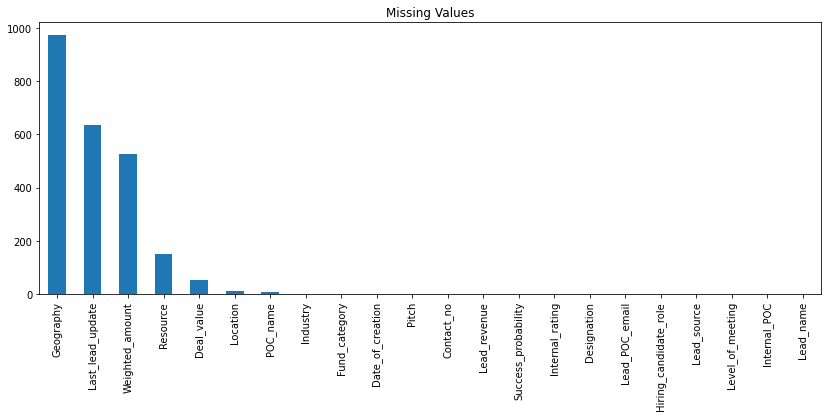

In [30]:
miss.plot(kind='bar',figsize=(14,5))
plt.title('Missing Values')
plt.show()

In [31]:
 miss_t = test.isna().sum().sort_values(ascending=False)

In [32]:
miss_t

Last_lead_update         168
Geography                 79
Weighted_amount           60
Resource                  14
Deal_value                 5
Location                   3
POC_name                   2
Industry                   1
Lead_revenue               0
Lead_name                  0
Date_of_creation           0
Pitch                      0
Contact_no                 0
Internal_rating            0
Fund_category              0
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Internal_POC               0
Deal_title                 0
dtype: int64

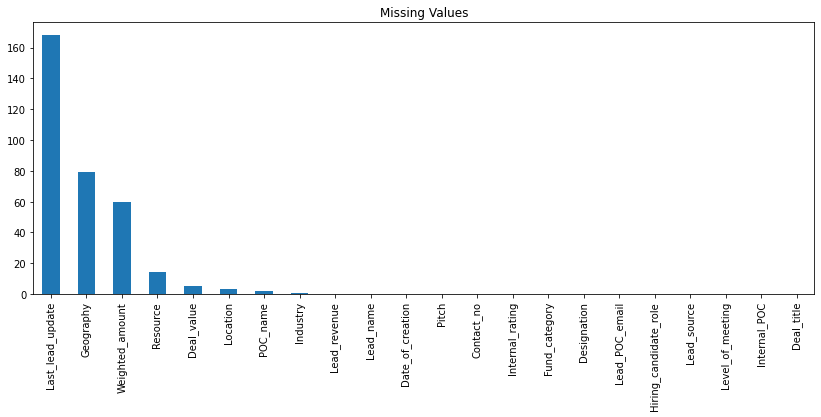

In [33]:
miss_t.plot(kind='bar',figsize=(14,5))
plt.title('Missing Values')
plt.show()

In [34]:
#remove all columns having no values
train.dropna(axis=1, how="all", inplace=True)
train.dropna(axis=0, how="all", inplace=True)
datashape(train)

The dataset contains  7007 rows and 22 columns.


In [35]:
 miss = train.isna().sum().sort_values(ascending=False)
 miss

Geography                972
Last_lead_update         633
Weighted_amount          525
Resource                 149
Deal_value                51
Location                  11
POC_name                   8
Industry                   1
Fund_category              0
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Success_probability        0
Internal_rating            0
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Internal_POC               0
Lead_name                  0
dtype: int64

In [36]:
def fillNanValues(df, col, value):
    df[col].fillna(value, inplace=True)

In [37]:
train['Geography'].unique()

array(['USA', 'India', nan], dtype=object)

In [38]:
fillNanValues(train, 'Geography', train['Geography'].mode()[0])
fillNanValues(test, 'Geography', test['Geography'].mode()[0])
print(train['Geography'].isna().any())#any returns boolean values
print(test['Geography'].isna().any())

False
False


In [39]:
train['Geography'].unique()

array(['USA', 'India'], dtype=object)

In [40]:
train['Last_lead_update'].unique()

array(['No track', 'Did not hear back after Level 1', '?', 'Up-to-date',
       '2 days back', 'More than 2 weeks', '5 days back',
       'more than a month', 'Following up but lead not responding', nan,
       'More than a week back', 'Pending'], dtype=object)

In [41]:
fillNanValues(train, 'Last_lead_update', train['Last_lead_update'].mode()[0])
fillNanValues(test, 'Last_lead_update', test['Last_lead_update'].mode()[0])
print(train['Last_lead_update'].isna().any())#any returns boolean values
print(test['Last_lead_update'].isna().any())

False
False


In [42]:
train['Last_lead_update'].unique()

array(['No track', 'Did not hear back after Level 1', '?', 'Up-to-date',
       '2 days back', 'More than 2 weeks', '5 days back',
       'more than a month', 'Following up but lead not responding',
       'More than a week back', 'Pending'], dtype=object)

In [43]:
train['Weighted_amount'].unique()

array(['2067263.7$', '240876.8$', '2407926.4$', ..., '1453372.8$',
       '794720.5$', '1642281.45$'], dtype=object)

In [44]:

fillNanValues(train, 'Weighted_amount', train['Weighted_amount'].mode()[0])
fillNanValues(test, 'Weighted_amount', test['Weighted_amount'].mode()[0])
print(train['Weighted_amount'].isna().any())#any returns boolean values
print(test['Weighted_amount'].isna().any())

False
False


In [45]:
train['Weighted_amount'].unique()

array(['2067263.7$', '240876.8$', '2407926.4$', ..., '1453372.8$',
       '794720.5$', '1642281.45$'], dtype=object)

In [46]:
train['Resource'].unique()

array([nan, 'No', 'We have all the requirements', 'Deliverable',
       'Cannot deliver', 'Not enough', 'Yes'], dtype=object)

In [47]:
fillNanValues(train, 'Resource', train['Resource'].mode()[0])
fillNanValues(test, 'Resource', test['Resource'].mode()[0])
print(train['Resource'].isna().any())#any returns boolean values
print(test['Resource'].isna().any())

False
False


In [48]:
train['Resource'].unique()

array(['No', 'We have all the requirements', 'Deliverable',
       'Cannot deliver', 'Not enough', 'Yes'], dtype=object)

In [49]:
train['Deal_value'].unique()

array(['320506$', '39488$', '359392$', ..., '253608$', '118615$',
       '258627$'], dtype=object)

In [50]:
fillNanValues(train, 'Deal_value', train['Deal_value'].mode()[0])
fillNanValues(test, 'Deal_value', test['Deal_value'].mode()[0])
print(train['Deal_value'].isna().any())#any returns boolean values
print(test['Deal_value'].isna().any())

False
False


In [51]:
train['Location'].unique()

array(['Killeen-Temple, TX', 'Ratlam', 'Albany-Schenectady-Troy, NY',
       'Mount Vernon-Anacortes, WA', 'Shimoga', 'Bulandshahr',
       'Salisbury, MD-DE', 'Jacksonville, FL',
       'Seattle-Tacoma-Bellevue, WA', 'Clarksville, TN-KY',
       'Oxnard-Thousand Oaks-Ventura, CA', 'Lafayette, LA',
       'Danville, IL', 'Pilibhit', 'Nanded', 'Mobile, AL',
       'Miami-Fort Lauderdale-West Palm Beach, FL', 'Columbus, IN',
       'Vellore', 'Srinagar', 'Peoria, IL', 'Alipurduar', 'Bharauri',
       'Ahmadnagar', 'Grand Junction, CO', 'Chirala', 'Bhubaneshwar',
       'Chambersburg-Waynesboro, PA', 'Thanjavur', 'Bakshpur',
       'Springfield, OH', 'Gaya', 'Puducherry', 'Chico, CA', 'Bellary',
       'Monroe, MI', 'Winchester, VA-WV', 'Salinas, CA',
       'Watertown-Fort Drum, NY', 'Providence-Warwick, RI-MA',
       'Dibrugarh', 'Gadsden, AL', 'Tiruvannamalai', 'Dayton, OH',
       'Ranchi', 'Lake Havasu City-Kingman, AZ',
       'Lakeland-Winter Haven, FL', 'Reno, NV',
       'Kingsp

In [52]:
fillNanValues(train, 'Location', train['Location'].mode()[0])
fillNanValues(test, 'Location', test['Location'].mode()[0])
print(train['Location'].isna().any())#any returns boolean values
print(test['Location'].isna().any())

False
False


In [53]:
train['POC_name'].unique()

array(['Charlene Werner', 'rakhi', 'Ariel Hamilton', ...,
       'Nicholas Duncan', 'Wayne Williams', 'Carol Strickland'],
      dtype=object)

In [54]:
fillNanValues(train, 'POC_name', train['POC_name'].mode()[0])
fillNanValues(test, 'POC_name', test['POC_name'].mode()[0])
print(train['POC_name'].isna().any())#any returns boolean values
print(test['POC_name'].isna().any())

False
False


In [55]:
train['Industry'].unique()

array(['Restaurants', 'Construction Services', 'Hospitals/Clinics',
       'Real Estate', 'Financial Services', 'Banks',
       'Architecture/Engineering', 'Education/Training', 'REIT',
       'Healthcare Facilities/Services', 'Hotels/Motels',
       'Biotech/Healthcare', 'Services', 'Other Investment Firms',
       'Software', 'Other Biz Services', 'Materials/Manufacturing',
       'Other', 'Trucking', 'Automotive/Transportation',
       'Constr - Supplies', 'Casinos/Gaming', 'Food Processing',
       'BioTech/Drugs', 'Investment Bank/Brokerage',
       'Technology Consulting', 'Grocery', 'Online Banking', 'Staffing',
       'Associations', 'Consumer Products', 'Professional Services',
       'Insurance', 'Beverages (Non-Alcoholic)', 'Non-Profit',
       'Internet Software', 'Software Consulting', 'Energy',
       'Furniture/Fixtures', 'Recreational Products',
       'Chemical Manufacturing', 'Personal Services', 'Training',
       'Health/Accident', 'Marketing/Advertising', 'Telecom 

In [56]:
fillNanValues(train, 'Industry', train['Industry'].mode()[0])
fillNanValues(test, 'Industry', test['Industry'].mode()[0])
print(train['Industry'].isna().any())#any returns boolean values
print(test['Industry'].isna().any())

False
False


In [57]:
train['Last_lead_update'].value_counts()

Following up but lead not responding    1260
Up-to-date                               623
more than a month                        605
No track                                 601
?                                        585
5 days back                              564
2 days back                              559
More than 2 weeks                        556
More than a week back                    554
Did not hear back after Level 1          553
Pending                                  547
Name: Last_lead_update, dtype: int64

In [58]:
# setting missing values to most occurring values
train['Last_lead_update'] = train['Last_lead_update'].apply(lambda x:'No track' if x == '?' else x)
test['Last_lead_update'] = test['Last_lead_update'].apply(lambda x:'No track' if x == '?' else x)
train['Last_lead_update'].unique()

array(['No track', 'Did not hear back after Level 1', 'Up-to-date',
       '2 days back', 'More than 2 weeks', '5 days back',
       'more than a month', 'Following up but lead not responding',
       'More than a week back', 'Pending'], dtype=object)

In [59]:
train['Last_lead_update'].value_counts()

Following up but lead not responding    1260
No track                                1186
Up-to-date                               623
more than a month                        605
5 days back                              564
2 days back                              559
More than 2 weeks                        556
More than a week back                    554
Did not hear back after Level 1          553
Pending                                  547
Name: Last_lead_update, dtype: int64

In [60]:
train[:5]

,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3,73.6
1,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,No track,"Georgakopoulos,Vasilios T",No,4,68.8
3,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Lee and Sons PLC,Financial Services,483896$,2590876.2$,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [61]:
train['Date_of_creation'] = pd.to_datetime(train['Date_of_creation'])
test['Date_of_creation'] = pd.to_datetime(test['Date_of_creation'])

In [62]:
train['Date_of_creation'].dtypes

dtype('<M8[ns]')

In [63]:
#train['Deal_value'] = train['Deal_value'].replace({'\$':''}, regex = True).astype(str)
cols = ['Deal_value']
for col in cols:
    train[col] = train[col].map(lambda x: str(x).rstrip('$')).astype(float)
    test[col] = test[col].map(lambda x: str(x).rstrip('$')).astype(float)


In [64]:
train['Deal_value'] = pd.to_numeric(train['Deal_value'])
test['Deal_value'] = pd.to_numeric(test['Deal_value'])

In [65]:
#for col in cols:
#    df[col] = df[col].map(lambda x: str(x).lstrip('*').rstrip('*')).astype(float)
cols = ['Weighted_amount']
for col in cols:
    train[col] = train[col].map(lambda x: str(x).rstrip('$')).astype(float)
    test[col] = test[col].map(lambda x: str(x).rstrip('$')).astype(float)


In [66]:
train['Weighted_amount'] = pd.to_numeric(train['Weighted_amount'])
test['Weighted_amount'] = pd.to_numeric(test['Weighted_amount'])

In [67]:
train[:2]

,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.7,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3,73.6
1,Bender PLC LLC,Construction Services,39488.0,240876.8,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9


In [68]:
# remove non-useful features
#'POC_name', 'Lead_POC_email','Contact_no','Location',,'Deal_value','Weighted_amount'
#'Lead_name','POC_name', 'Lead_POC_email','Contact_no','Location',
colsToRemove = ['Date_of_creation']
train.drop(colsToRemove, inplace=True, axis=1)
test.drop(colsToRemove, inplace=True, axis=1)
train.head()

,Lead_name,Industry,Deal_value,Weighted_amount,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.7,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",No,3,73.6
1,Bender PLC LLC,Construction Services,39488.0,240876.8,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.4,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,No track,"Georgakopoulos,Vasilios T",No,4,68.8
3,Garcia Ltd Ltd,Real Estate,76774.0,468321.4,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Lee and Sons PLC,Financial Services,483896.0,2590876.2,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [69]:
# segregate numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [70]:
continuous_data, categorical_data = divideFeatures(train)

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
cat_feature = ['Pitch', 'Lead_revenue', 'Fund_category', 'Geography','Resource','Level_of_meeting','Lead_source']

In [73]:
le = LabelEncoder()
#label_columns=categorical_data.columns
label_columns=cat_feature

for label_column in label_columns:
    train[label_column] = le.fit_transform(train[label_column])

In [74]:
for label_column in label_columns:
    test[label_column] = le.fit_transform(test[label_column])

In [75]:
train[:5]

,Lead_name,Industry,Deal_value,Weighted_amount,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.7,1,607.447.7883,1,1,1,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,3,2,No track,"Davis,Sharrice A",2,3,73.6
1,Bender PLC LLC,Construction Services,39488.0,240876.8,1,892-938-9493,2,3,0,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,2,0,Did not hear back after Level 1,"Brown,Maxine A",2,5,58.9
2,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.4,0,538.748.2271,2,3,1,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,1,0,No track,"Georgakopoulos,Vasilios T",2,4,68.8
3,Garcia Ltd Ltd,Real Estate,76774.0,468321.4,1,(692)052-1389x75188,2,2,1,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",0,1,Did not hear back after Level 1,"Brown,Maxine A",4,1,64.5
4,Lee and Sons PLC,Financial Services,483896.0,2590876.2,1,001-878-814-6134x015,1,2,0,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,3,1,Up-to-date,"Thomas,Lori E",2,4,62.4


In [76]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting features from text columns using CountVectorizer
def CountVect(column, train, test):
    vect = CountVectorizer()
    
    train_feature = vect.fit_transform(train[column])
    train_feature = pd.DataFrame(train_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    train = pd.concat([train, train_feature], axis=1)
    
    test_feature = vect.transform(test[column])
    test_feature = pd.DataFrame(test_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    test = pd.concat([test, test_feature], axis=1)
    
    return train, test

In [77]:
# segregate numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [78]:
continuous_data, categorical_data = divideFeatures(train)

In [79]:
for col in categorical_data:
    print(f'{col} : {categorical_data[col].nunique()}')

Lead_name : 7007
Industry : 171
Contact_no : 7007
Location : 597
POC_name : 5261
Designation : 10
Lead_POC_email : 7007
Hiring_candidate_role : 639
Last_lead_update : 10
Internal_POC : 60


In [80]:
# Calling 'CountVec' function for these columns
for column in ['Industry', 'POC_name', 'Designation', 'Hiring_candidate_role','Last_lead_update','Internal_POC']:
    train, test = CountVect(column, train, test)

In [81]:
# Dropping columns after text feature extraction
train.drop(['Lead_POC_email','Location','Contact_no','Lead_name','Industry', 'POC_name', 'Designation', 'Hiring_candidate_role','Last_lead_update','Internal_POC'], axis=1, inplace=True)

test.drop(['Lead_POC_email','Location','Contact_no','Lead_name','Industry', 'POC_name', 'Designation', 'Hiring_candidate_role','Last_lead_update','Internal_POC'], axis=1, inplace=True)

In [82]:
train[:2]

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability,Industry0,Industry1,Industry2,Industry3,Industry4,Industry5,Industry6,Industry7,Industry8,Industry9,Industry10,Industry11,Industry12,Industry13,Industry14,Industry15,Industry16,Industry17,Industry18,Industry19,Industry20,Industry21,Industry22,Industry23,Industry24,Industry25,Industry26,Industry27,Industry28,...,Internal_POC78,Internal_POC79,Internal_POC80,Internal_POC81,Internal_POC82,Internal_POC83,Internal_POC84,Internal_POC85,Internal_POC86,Internal_POC87,Internal_POC88,Internal_POC89,Internal_POC90,Internal_POC91,Internal_POC92,Internal_POC93,Internal_POC94,Internal_POC95,Internal_POC96,Internal_POC97,Internal_POC98,Internal_POC99,Internal_POC100,Internal_POC101,Internal_POC102,Internal_POC103,Internal_POC104,Internal_POC105,Internal_POC106,Internal_POC107,Internal_POC108,Internal_POC109,Internal_POC110,Internal_POC111,Internal_POC112,Internal_POC113,Internal_POC114,Internal_POC115,Internal_POC116,Internal_POC117
0,320506.0,2067263.7,1,1,1,1,3,2,2,3,73.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39488.0,240876.8,1,2,3,0,2,0,2,5,58.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
test[:2]

,Deal_title,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Resource,Internal_rating,Industry0,Industry1,Industry2,Industry3,Industry4,Industry5,Industry6,Industry7,Industry8,Industry9,Industry10,Industry11,Industry12,Industry13,Industry14,Industry15,Industry16,Industry17,Industry18,Industry19,Industry20,Industry21,Industry22,Industry23,Industry24,Industry25,Industry26,Industry27,Industry28,...,Internal_POC78,Internal_POC79,Internal_POC80,Internal_POC81,Internal_POC82,Internal_POC83,Internal_POC84,Internal_POC85,Internal_POC86,Internal_POC87,Internal_POC88,Internal_POC89,Internal_POC90,Internal_POC91,Internal_POC92,Internal_POC93,Internal_POC94,Internal_POC95,Internal_POC96,Internal_POC97,Internal_POC98,Internal_POC99,Internal_POC100,Internal_POC101,Internal_POC102,Internal_POC103,Internal_POC104,Internal_POC105,Internal_POC106,Internal_POC107,Internal_POC108,Internal_POC109,Internal_POC110,Internal_POC111,Internal_POC112,Internal_POC113,Internal_POC114,Internal_POC115,Internal_POC116,Internal_POC117
0,TitleAD16O,200988.0,1002116.7,0,0,3,0,1,0,2,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TitleOW6CR,409961.0,2541758.2,0,0,2,1,1,1,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
#testing_col=['Industry']
		
#for col in testing_col:
  #  print(f'{col} : {train[col].unique()}')

In [85]:
train.shape

(7007, 3743)

In [86]:
test[:1]

,Deal_title,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Resource,Internal_rating,Industry0,Industry1,Industry2,Industry3,Industry4,Industry5,Industry6,Industry7,Industry8,Industry9,Industry10,Industry11,Industry12,Industry13,Industry14,Industry15,Industry16,Industry17,Industry18,Industry19,Industry20,Industry21,Industry22,Industry23,Industry24,Industry25,Industry26,Industry27,Industry28,...,Internal_POC78,Internal_POC79,Internal_POC80,Internal_POC81,Internal_POC82,Internal_POC83,Internal_POC84,Internal_POC85,Internal_POC86,Internal_POC87,Internal_POC88,Internal_POC89,Internal_POC90,Internal_POC91,Internal_POC92,Internal_POC93,Internal_POC94,Internal_POC95,Internal_POC96,Internal_POC97,Internal_POC98,Internal_POC99,Internal_POC100,Internal_POC101,Internal_POC102,Internal_POC103,Internal_POC104,Internal_POC105,Internal_POC106,Internal_POC107,Internal_POC108,Internal_POC109,Internal_POC110,Internal_POC111,Internal_POC112,Internal_POC113,Internal_POC114,Internal_POC115,Internal_POC116,Internal_POC117
0,TitleAD16O,200988.0,1002116.7,0,0,3,0,1,0,2,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
test_df=test.drop(['Deal_title'],axis=1)

In [88]:
test.shape

(2093, 3743)

In [89]:
test_df.shape

(2093, 3742)

In [90]:
test_df[:2]

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Resource,Internal_rating,Industry0,Industry1,Industry2,Industry3,Industry4,Industry5,Industry6,Industry7,Industry8,Industry9,Industry10,Industry11,Industry12,Industry13,Industry14,Industry15,Industry16,Industry17,Industry18,Industry19,Industry20,Industry21,Industry22,Industry23,Industry24,Industry25,Industry26,Industry27,Industry28,Industry29,...,Internal_POC78,Internal_POC79,Internal_POC80,Internal_POC81,Internal_POC82,Internal_POC83,Internal_POC84,Internal_POC85,Internal_POC86,Internal_POC87,Internal_POC88,Internal_POC89,Internal_POC90,Internal_POC91,Internal_POC92,Internal_POC93,Internal_POC94,Internal_POC95,Internal_POC96,Internal_POC97,Internal_POC98,Internal_POC99,Internal_POC100,Internal_POC101,Internal_POC102,Internal_POC103,Internal_POC104,Internal_POC105,Internal_POC106,Internal_POC107,Internal_POC108,Internal_POC109,Internal_POC110,Internal_POC111,Internal_POC112,Internal_POC113,Internal_POC114,Internal_POC115,Internal_POC116,Internal_POC117
0,200988.0,1002116.7,0,0,3,0,1,0,2,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,409961.0,2541758.2,0,0,2,1,1,1,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
continuous_data_t, categorical_data_t = divideFeatures(test_df)

In [92]:
categorical_data_t[:2]

""
0
1


In [93]:
test_df[:2]

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Resource,Internal_rating,Industry0,Industry1,Industry2,Industry3,Industry4,Industry5,Industry6,Industry7,Industry8,Industry9,Industry10,Industry11,Industry12,Industry13,Industry14,Industry15,Industry16,Industry17,Industry18,Industry19,Industry20,Industry21,Industry22,Industry23,Industry24,Industry25,Industry26,Industry27,Industry28,Industry29,...,Internal_POC78,Internal_POC79,Internal_POC80,Internal_POC81,Internal_POC82,Internal_POC83,Internal_POC84,Internal_POC85,Internal_POC86,Internal_POC87,Internal_POC88,Internal_POC89,Internal_POC90,Internal_POC91,Internal_POC92,Internal_POC93,Internal_POC94,Internal_POC95,Internal_POC96,Internal_POC97,Internal_POC98,Internal_POC99,Internal_POC100,Internal_POC101,Internal_POC102,Internal_POC103,Internal_POC104,Internal_POC105,Internal_POC106,Internal_POC107,Internal_POC108,Internal_POC109,Internal_POC110,Internal_POC111,Internal_POC112,Internal_POC113,Internal_POC114,Internal_POC115,Internal_POC116,Internal_POC117
0,200988.0,1002116.7,0,0,3,0,1,0,2,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,409961.0,2541758.2,0,0,2,1,1,1,5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
train.isna().sum().head(20)

Deal_value             0
Weighted_amount        0
Pitch                  0
Lead_revenue           0
Fund_category          0
Geography              0
Lead_source            0
Level_of_meeting       0
Resource               0
Internal_rating        0
Success_probability    0
Industry0              0
Industry1              0
Industry2              0
Industry3              0
Industry4              0
Industry5              0
Industry6              0
Industry7              0
Industry8              0
dtype: int64

In [280]:
!pip install catboost
!pip install category_encoders

In [100]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LassoCV, ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from category_encoders import MEstimateEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [95]:
X = train.drop('Success_probability', axis=1)
y= train['Success_probability']

In [96]:
y

0        73.60
1        58.90
2        68.80
3        64.50
4        62.40
         ...  
7002    107.34
7003     26.35
7004     70.60
7005     -5.00
7006     68.70
Name: Success_probability, Length: 7007, dtype: float64

In [145]:
y=np.log(y)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [97]:
y

0        73.60
1        58.90
2        68.80
3        64.50
4        62.40
         ...  
7002    107.34
7003     26.35
7004     70.60
7005     -5.00
7006     68.70
Name: Success_probability, Length: 7007, dtype: float64

In [98]:
# Stacking regressor function to ensemble LGBM and CatBoost
def get_stacking():
    level0 = [#('lgbm_regressor', lgb.LGBMRegressor(n_estimators=3000, max_depth=11, learning_rate=0.06, num_leaves=40)),
              #('gradient_regressor',GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03)),
               ('XGB_regressor', xgb.XGBRegressor(n_estimators=700, objective='reg:squarederror', max_depth=7, learning_rate=0.06, colsample_bytree=0.9, subsample=0.8))]
               #('catboost', CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=2000, depth=6))]
    
    level1 = ExtraTreesRegressor()
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [102]:
# K-Fold Cross Validation 
kf = KFold(n_splits=10, shuffle=True)
scores = []
for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train = X.iloc[train_index]
    #X_train = ordinal_enc(X_train, cat_feature)
    #for col in cat_feature:
      #X_train[col] = le.fit_transform(X_train[col])
    
   # y_train = np.log(y.iloc[train_index])
    y_train = y.iloc[train_index]

    
    X_test = X.iloc[test_index]
    #X_test = label_enc(X_test, cat_feature, testing=True)
    #for col in cat_feature:
      #X_test[col] = le.fit_transform(X_test[col])

    y_test = y.iloc[test_index]
    
    model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.03)
    #model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    #model = ElasticNet()
    #model = lgb.LGBMRegressor(n_estimators=2500, max_depth=11, learning_rate=0.05, num_leaves=40)
    #model = xgb.XGBRegressor(n_estimators=590, objective='reg:squarederror', max_depth=7, learning_rate=0.06, min_child_weight=1.2)
    #model = get_stacking()
    #model = ExtraTreesRegressor(n_estimators=500, bootstrap=True, n_jobs=-1)
    #model = LinearRegression()
    #model = KNeighborsRegressor(weights='distance', n_neighbors=15)
    #model = CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=1700, depth=6)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
 
    score = np.sqrt(mean_squared_error(y_test, (pred)))#np.expm1
    print(f'RMSLE score for fold {fold} is {score}')
    scores.append(score)

print(f'Mean RMSLE score is {np.mean(scores)}')

RMSLE score for fold 1 is 17.641006207038767
RMSLE score for fold 2 is 17.310159410520914
RMSLE score for fold 3 is 17.283583065246756
RMSLE score for fold 4 is 16.611788129933743
RMSLE score for fold 5 is 18.295877408536537
RMSLE score for fold 6 is 17.036918598628333
RMSLE score for fold 7 is 18.443107108506
RMSLE score for fold 8 is 17.014409908311194
RMSLE score for fold 9 is 17.556725551516756
RMSLE score for fold 10 is 19.135179846202632
Mean RMSLE score is 17.632875523444163


In [108]:
# Stack Model 
model = get_stacking()

In [ ]:
# Log transforming Target Variable before training
#yn = np.log1p(y)

# Model Training
model.fit(X, y)

In [ ]:
qw=model.predict(test_df)

In [ ]:
# Making Predictions and using 'expm1' to convert it back to original form

sub = pd.DataFrame()

In [ ]:
sub['Deal_title'] = test['Deal_title']
sub['Success_probability'] =qw

In [106]:
sub

,Deal_title,Success_probability
0,TitleAD16O,60.368127
1,TitleOW6CR,65.424654
2,TitleVVJQ5,68.001816
3,TitleUS8NA,65.519517
4,Title5VGWW,66.829034
...,...,...
2088,Title2R8VU,66.829034
2089,Title7HCNJ,67.237907
2090,TitleCD5YZ,61.468770
2091,Title8OKXL,62.019911


In [107]:
sub.to_csv("kfold_XGB_GB-1.csv",index=False)

In [398]:
n=pd.read_csv("/content/stacked_-cat,lin,lgbm.csv")
n[:1]

,Deal_title,Success_probability
0,TitleAD16O,63.337615


**Another Approach**

In [84]:
# split into train dev and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=30)

In [85]:
X_train[:2]

,Lead_name,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
4620,3060,66,210238.0,1377058.9,0,2,1,0,8,393,1,2,1,17,0,3
4072,6281,7,383406.0,2453798.4,0,0,1,1,7,70,3,2,7,30,5,2


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 4620 to 5925
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lead_name              5955 non-null   int64  
 1   Industry               5955 non-null   int64  
 2   Deal_value             5955 non-null   float64
 3   Weighted_amount        5955 non-null   float64
 4   Pitch                  5955 non-null   int64  
 5   Lead_revenue           5955 non-null   int64  
 6   Fund_category          5955 non-null   int64  
 7   Geography              5955 non-null   int64  
 8   Designation            5955 non-null   int64  
 9   Hiring_candidate_role  5955 non-null   int64  
 10  Lead_source            5955 non-null   int64  
 11  Level_of_meeting       5955 non-null   int64  
 12  Last_lead_update       5955 non-null   int64  
 13  Internal_POC           5955 non-null   int64  
 14  Resource               5955 non-null   int64  
 15  I

In [ ]:
continuous_data[:2]

,Internal_rating,Success_probability
0,3,73.6
1,5,58.9


In [87]:
import sklearn.preprocessing as pre
#scaler = pre.RobustScaler()
#scaler = pre.MinMaxScaler()
scaler = pre.StandardScaler()

# apply scaling to all numerical variables except dummy variables as they are already between 0 and 1
X_train= pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

#scale test data with transform()
X_test= pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled= scaler.transform(X_test)
X_test_scaled = scaler.transform(test_df)
'''
#new_test= pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
# view sample data
#X_train.describe()
X_train.head()
print(X_train.shape,X_test.shape)

(5955, 16) (1052, 16)


In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 57kB/s 


In [101]:
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import catboost as cb
import xgboost as xgb
import lightgbm as lgb 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error,accuracy_score,f1_score

In [ ]:
models=[cb.CatBoostRegressor(verbose=0, iterations=100),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(random_state=0, n_estimators=100),xgb.XGBRegressor(n_estimators = 400),lgb.LGBMRegressor(random_state=1, n_jobs=-1,learning_rate=0.15, n_estimators=100)]
model_names=['CatBoost Regressor','Randomforest Regressor','Kneighbors Regressor','DecisionTreeRegressor','GradientBoostingRegressor','AdaBoostRegressor','XGBRegressor','LGBM Regressor']
rmse=[]
accuracy=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
    accuracy.append(clf.score(X_test,y_test))
d={'Modelling Algo':model_names,'RMSE':rmse,"Accuracy":accuracy}  

[06:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
data_model = pd.DataFrame(d)

In [ ]:
data_model

,Modelling Algo,RMSE,Accuracy
0,CatBoost Regressor,18.468965,-0.046180
1,Randomforest Regressor,18.168170,-0.012380
2,Kneighbors Regressor,19.243453,-0.135762
3,DecisionTreeRegressor,26.052196,-1.081661
4,GradientBoostingRegressor,17.616122,0.048208
5,AdaBoostRegressor,17.927493,0.014264
6,XGBRegressor,17.879736,0.019509
7,LGBM Regressor,18.176486,-0.013308


In [ ]:
#def printScore(y_train, y_train_pred):
#    print(f1_score(y_train, y_train_pred))#average="macro"

**Model that gives me 84 and 92 % accuracy in the leaderboard**

In [89]:
GBR_model = GradientBoostingRegressor(n_estimators=400)
GBR_model.fit(X_train, y_train)

# predict
y_train_pred = GBR_model.predict(X_train)
y_test_pred = GBR_model.predict(X_test)
#print(accuracy_score(y_train, y_train_pred))
#print(accuracy_score(y_test, y_test_pred))
#printScore(y_train, y_train_pred)
#printScore(y_test, y_test_pred)

In [90]:
gb_p = GBR_model.predict(test_df)

In [91]:
rmslg=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [92]:
rmslg

18.12266116068295

In [ ]:
subm.head()

,Deal_title,Success_probability
0,TitleM5DZY,48.6
1,TitleKIW18,33.9
2,TitleFXSDN,43.8
3,TitlePSK4Y,39.5
4,Title904GV,37.4


In [ ]:
submmitted_data = pd.DataFrame()
submmitted_data['Deal_title'] = test['Deal_title']
submmitted_data['Success_probability'] =gb_p

In [ ]:
submmitted_data

,Deal_title,Success_probability
0,TitleAD16O,63.120717
1,TitleOW6CR,53.406673
2,TitleVVJQ5,54.185298
3,TitleUS8NA,52.257977
4,Title5VGWW,49.363223
...,...,...
2088,Title2R8VU,53.406673
2089,Title7HCNJ,64.644692
2090,TitleCD5YZ,49.431405
2091,Title8OKXL,49.246045


In [ ]:
submmitted_data.to_csv("gradient-13.csv")

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
crs=cross_val_score(GBR_model, X_train, y_train, cv=cv)

In [ ]:
crs

array([-0.03378679, -0.06029835, -0.05177473,  0.00268841, -0.0481258 ])

In [ ]:
crs_m=crs.mean()

In [ ]:
submmitted_data = pd.DataFrame()
submmitted_data['Deal_title'] = test['Deal_title']
submmitted_data['Success_probability'] =

In [ ]:
submmitted_data.to_csv("gradient-10.csv")

In [ ]:
CB_model = cb.CatBoostRegressor(iterations=300)
CB_model.fit(X_train, y_train)

# predict
y_train_pred = CB_model.predict(X_train)
y_test_pred = CB_model.predict(X_test)
#print(accuracy_score(y_train, y_train_pred))
#print(accuracy_score(y_test, y_test_pred))
#printScore(y_train, y_train_pred)
#printScore(y_test, y_test_pred)

Learning rate set to 0.133881
0:	learn: 17.8403297	total: 1.42ms	remaining: 426ms
1:	learn: 17.7524887	total: 3.81ms	remaining: 567ms
2:	learn: 17.6864960	total: 6.55ms	remaining: 649ms
3:	learn: 17.6237258	total: 9.18ms	remaining: 679ms
4:	learn: 17.5725128	total: 11.5ms	remaining: 679ms
5:	learn: 17.5252119	total: 14ms	remaining: 688ms
6:	learn: 17.4810691	total: 16.4ms	remaining: 687ms
7:	learn: 17.4391334	total: 18.6ms	remaining: 680ms
8:	learn: 17.4092845	total: 20.8ms	remaining: 672ms
9:	learn: 17.3697873	total: 23.2ms	remaining: 673ms
10:	learn: 17.3352062	total: 26.9ms	remaining: 706ms
11:	learn: 17.3055312	total: 29.3ms	remaining: 703ms
12:	learn: 17.2798242	total: 31.6ms	remaining: 698ms
13:	learn: 17.2535368	total: 34ms	remaining: 695ms
14:	learn: 17.2276307	total: 36.2ms	remaining: 688ms
15:	learn: 17.2030278	total: 38.5ms	remaining: 684ms
16:	learn: 17.1830313	total: 40.9ms	remaining: 680ms
17:	learn: 17.1676346	total: 42.9ms	remaining: 673ms
18:	learn: 17.1546998	total: 4

In [ ]:
cb_p = CB_model.predict(test_df)

In [ ]:
rmscb=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [ ]:
rmscb

18.152879292295587

In [ ]:
submmitted_data = pd.DataFrame()
submmitted_data['Deal_title'] = test['Deal_title']
submmitted_data['Success_probability'] =cb_p

In [ ]:
submmitted_data.to_csv("CB-2.csv")

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
extreg=ExtraTreesRegressor(n_estimators=200)
extreg.fit(X_train, y_train).score(X_test, y_test)

-0.023796334028811872

In [ ]:
y_train_pred = CB_model.predict(X_train)
y_test_pred = CB_model.predict(X_test)

In [ ]:
ext_p = extreg.predict(test_df)

In [ ]:
rmsext=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [ ]:
rmsext

18.152879292295587

In [ ]:
submmitted_data = pd.DataFrame()
submmitted_data['Deal_title'] = test['Deal_title']
submmitted_data['Success_probability'] =ext_p

In [ ]:
submmitted_data.to_csv("ext-1.csv")

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [('GB', GradientBoostingRegressor()),('XGB', xgb.XGBRegressor()),('ADB',AdaBoostRegressor())]
clf = StackingRegressor(estimators=estimators, final_estimator=lgb.LGBMRegressor())
clf.fit(X_train, y_train).score(X_test, y_test)

[16:35:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-3.567830518802495e-05

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
stacked_p = clf.predict(test_df)

In [ ]:
rms_stacked=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [ ]:
rms_stacked

18.057060455935172

In [ ]:
submmitted_data = pd.DataFrame()
submmitted_data['Deal_title'] = test['Deal_title']
submmitted_data['Success_probability'] =stacked_p

In [ ]:
submmitted_data.to_csv("stacked-1.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.model_selection import cross_validate  #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_val_score

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

#train = pd.read_csv('train_modified.csv')
#target = 'Success_probability'
#IDcol = 'ID'

In [ ]:
def modelfit(alg, X,y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    #dtrain_predprob = alg.predict_proba(X)
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X, y, cv=cv_folds)
    
    #Print model report:
    #print("\nModel Report")
    #print("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    #print("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

CV Score : Mean - 0.02250241 | Std - 0.005146607 | Min - 0.01492491 | Max - 0.02939001


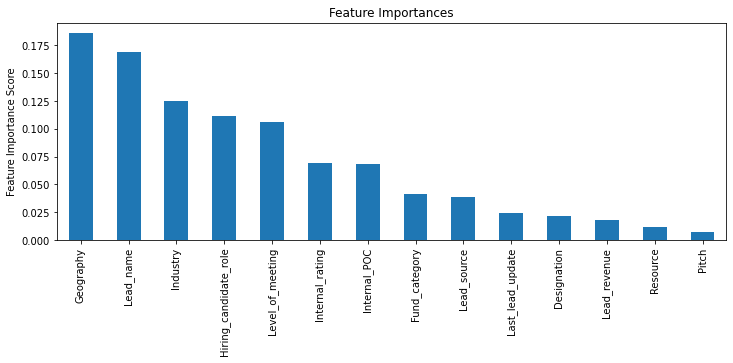

In [ ]:
#Choose all predictors except target & IDcols
#predictors =  [x for x in train.columns if x not in [target]]
gbm0 = GradientBoostingRegressor(random_state=10)
modelfit(gbm0, X, y)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:

param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [ ]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.27403703, 0.35402336, 0.52433295, 0.64270163, 0.77712812,
         0.89067607, 0.91437354]),
  'mean_score_time': array([0.01148949, 0.00706339, 0.01154647, 0.01275487, 0.01200576,
         0.01394958, 0.01077018]),
  'mean_test_score': array([-310.48598279, -310.83709626, -311.86151568, -312.39764707,
         -312.66790469, -313.15727887, -314.09945467]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'rank_test_score': array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
  'split0_test_score': array([-337.76008222, -337.95690215, -337.88105519, -337.76879689,
         -338.24401041, -338.80050075, -339.47696814]),
  'split1_test_scor

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# check maybe 10 kfolds would be better
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[400,500,1000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1,7,21]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=kfolds)

In [ ]:
search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weigh...
                                                 subsample=1.0, tol=0.0001,
                                     

In [ ]:
search.cv_results_

{'mean_fit_time': array([ 1.1768671 ,  1.40377579,  1.48085499,  1.17427387,  1.42625713,
         1.52989984,  1.18102307,  1.43183346,  1.53428159,  1.51439395,
         1.84657264,  1.92086697,  1.48144689,  1.76640677,  1.85537567,
         1.39711404,  1.76404343,  1.82679477,  2.89191327,  3.58642087,
         3.71109695,  2.87617602,  3.50046096,  3.64609919,  2.700564  ,
         3.30052562,  3.45969591,  1.69818125,  2.22009478,  2.56147704,
         1.67954068,  2.22657866,  2.57529812,  1.66589546,  2.23101878,
         2.5757019 ,  2.10237918,  2.79007826,  3.24386377,  2.09428782,
         2.81146293,  3.2846941 ,  2.17305908,  2.84462624,  3.25864019,
         4.22473927,  5.54176927,  6.45415831,  4.15156689,  5.63143034,
         6.48418331,  4.28311691,  5.5732687 ,  6.59704871,  3.09084921,
         4.31845551,  5.27580819,  3.1419467 ,  4.29396958,  5.2970222 ,
         3.27693357,  4.23810673,  5.00603852,  3.62554297,  5.01388178,
         6.14857759,  3.63426085, 

In [ ]:
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 1,
 'n_estimators': 1000,
 'random_state': 21,
 'subsample': 0.75}

In [ ]:
search.best_score_

-308.46026707561936

In [ ]:
GBR=GradientBoostingRegressor(learning_rate=0.01,max_depth=1,n_estimators=400,random_state=21,subsample=0.75)
GBR.fit(X_train, y_train)

# predict
y_train_pred = GBR.predict(X_train)
y_test_pred = GBR.predict(X_test)

In [ ]:
gb_hyp = GBR.predict(test_df)

In [ ]:
rms_gb_hyp=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [ ]:
rms_gb_hyp

17.692327418940394

In [ ]:
submmitted_data = pd.DataFrame()
submmitted_data['Deal_title'] = test['Deal_title']
submmitted_data['Success_probability'] =gb_hyp

In [ ]:
submmitted_data

,Deal_title,Success_probability
0,TitleAD16O,64.884510
1,TitleOW6CR,68.870100
2,TitleVVJQ5,69.089105
3,TitleUS8NA,69.068698
4,Title5VGWW,68.870100
...,...,...
2088,Title2R8VU,68.870100
2089,Title7HCNJ,68.870100
2090,TitleCD5YZ,66.923279
2091,Title8OKXL,66.724681


In [ ]:
submmitted_data.to_csv("gradient_hyp-1.csv")

In [ ]:
!pip install optuna


     |████████████████████████████████| 296kB 5.4MB/s 
     |████████████████████████████████| 163kB 5.7MB/s 
     |████████████████████████████████| 81kB 4.5MB/s 
     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 51kB 3.4MB/s 
     |████████████████████████████████| 112kB 8.5MB/s 
     |████████████████████████████████| 143kB 8.4MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=a81d61fd478d744a1d0e799d538f66e6d781ca67f8f7394d893a91c0cbcebd21
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
import lightgbm as lgbm
import optuna
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10) # for reproducibility
def objective(trial):
    
    # dtrain = lgb.Dataset(X_train, label=y_train)
    
    param = {
        'objective': 'regression',
        'metric': 'mean_absolute_error',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        # 'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 2000),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        # 'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'learning_rate': 0.01,
        'n_estimators': trial.suggest_int('n_estimators', 700, 3000),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    lgbm_regr = lgbm.LGBMRegressor(**param)
    lgbm_2 = lgbm_regr.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    return mean_absolute_error(np.expm1(y_test), np.expm1(lgbm_2.predict(X_test)))

study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2021-04-23 07:11:11,181] A new study created in memory with name: no-name-efb4b50e-6446-4b3d-ab6c-898ccf870012
[I 2021-04-23 07:11:16,017] Trial 0 finished with value: 3.2676237205121156e+45 and parameters: {'lambda_l1': 0.08747537025773001, 'lambda_l2': 1.537331564587801e-08, 'num_leaves': 325, 'n_estimators': 2422, 'feature_fraction': 0.6991042073815543, 'bagging_fraction': 0.5348779873185086, 'bagging_freq': 2, 'min_child_samples': 78}. Best is trial 0 with value: 3.2676237205121156e+45.
[I 2021-04-23 07:11:22,566] Trial 1 finished with value: 3.267623720508387e+45 and parameters: {'lambda_l1': 3.32657660618516e-07, 'lambda_l2': 6.238186113062485e-08, 'num_leaves': 352, 'n_estimators': 2893, 'feature_fraction': 0.4023689597967487, 'bagging_fraction': 0.707315358031466, 'bagging_freq': 6, 'min_child_samples': 63}. Best is trial 1 with value: 3.267623720508387e+45.
[I 2021-04-23 07:11:27,257] Trial 2 finished with value: 3.267623720511096e+45 and parameters: {'lambda_l1': 0.0313182

KeyboardInterrupt: ignored